# Function approximation with a deep neural network

## Quartic function and training dataset

In algebra, a quartic function is a function of the form
$$
f(t)=at^{4}+bt^{3}+ct^{2}+dt+e,
$$
where $a$ is nonzero, which is defined by a polynomial of degree four, called a quartic polynomial.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch


Define and plot a quartic function

In [0]:
D_in = 1
D_out = 1

# Create random Tensors to hold inputs and outputs
x = torch.arange(-9,3.5,0.1).view(-1,1) #(-5,3.5,0.1)
y = x**4 + 2*x**3 - 12*x**2 -2*x + 6
y = torch.where(x < -5, torch.zeros_like(x), y)
N = x.shape[0]

In [0]:
print(x.size())
print(y.size())


torch.Size([125, 1])
torch.Size([125, 1])


Converting Torch Tensor to NumPy Array for plotting the function

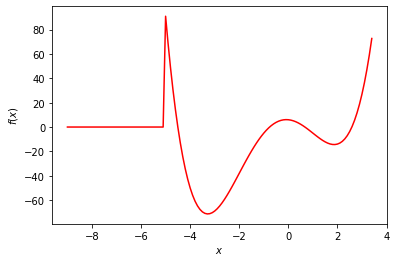

In [0]:
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()
ax.legend()
plt.show()

## Approximation with a deep neural network

### Question: code a deep neural network to approximate the function. The network will have 3 full-connected layers (followed by a ReLU activation function) and a final full-connected layer without any activation function. You will use the Adam optimizer. Choose the most appropriate loss function. You must compute the loss at each epoch.

In [0]:
import torch

H1 = 40 # number of hidden neurons
H2 = 20
H3 = 20

Niter = 5*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, H2),
    torch.nn.ReLU(),
    torch.nn.Linear(H2, H3),
    torch.nn.ReLU(),
    torch.nn.Linear(H3, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    


999 19.62350845336914
1999 1.4322857856750488
2999 3.6620116233825684
3999 0.05429023131728172
4999 0.03642111271619797


Plot the training error as a function of the epoch

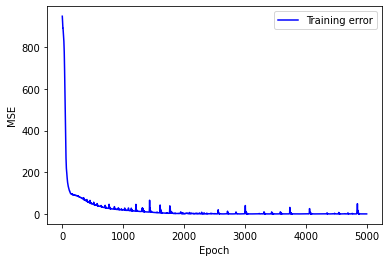

In [0]:
fig, ax = plt.subplots()
plt.plot(range(Niter),saveLoss,'b-',label='Training error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
ax.legend()
plt.show()

### Question: plot on the same graph the quartic function and its approximation

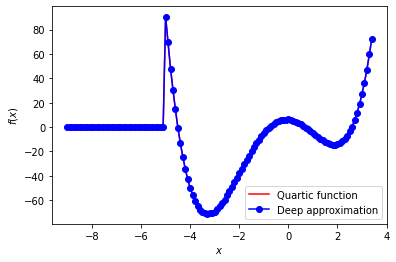

In [0]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

How many parameters?

In [0]:
# Function to count the number of parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


In [0]:
print(model.parameters)
print("\nTotal number of parameters {}\n".format(count_parameters(model)))

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)>

Total number of parameters 1341



Print all the parameters (just for seeing them)

In [0]:
for parameter in model.parameters():
    print(parameter)

Parameter containing:
tensor([[ 0.3617],
        [ 0.6714],
        [-0.2869],
        [ 0.0545],
        [-0.0098],
        [-0.0152],
        [ 0.0534],
        [ 0.5714],
        [ 0.0504],
        [ 0.7065],
        [-0.4337],
        [-0.6079],
        [-0.6019],
        [ 0.3085],
        [ 0.2026],
        [ 0.5581],
        [ 0.9141],
        [ 0.6606],
        [ 1.4435],
        [ 0.3975],
        [-0.1458],
        [ 0.3710],
        [ 0.6003],
        [ 0.2562],
        [ 0.3516],
        [ 0.6748],
        [ 0.2402],
        [-0.3628],
        [ 0.2813],
        [ 0.2451],
        [-0.2845],
        [ 0.3262],
        [ 0.7703],
        [ 0.6709],
        [-0.1883],
        [ 0.0849],
        [ 0.6755],
        [ 0.7946],
        [-0.2747],
        [ 0.3971]], requires_grad=True)
Parameter containing:
tensor([ 1.4746, -1.2292,  0.9992,  0.6664, -0.6943,  0.9710,  0.7555, -1.3867,
         1.1339, -1.6346, -0.1693, -0.1045, -1.5808,  1.5430,  0.9118, -1.5943,
         0.2722

## Approximation with a shallow neural network

### Question: code a one-hidden layer neural network with approximatively the same number of parameters than the multilayer neural network. What is the "best" architecture?

In [0]:
H1 = 5000 # number of hidden neurons

Niter = 20*10**3

import numpy as np
saveLoss = np.zeros(Niter)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.Linear(H1, D_out)
)
loss_fn = torch.nn.MSELoss(reduction='mean')

learning_rate = 1e-2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(Niter):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    saveLoss[t] = loss.detach().numpy()
    if t % 1000 == 999:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
    



999 89.1565933227539
1999 64.16036224365234
2999 52.82548141479492
3999 45.75350570678711
4999 38.6285400390625
5999 33.46873474121094
6999 30.278461456298828
7999 27.44321632385254
8999 25.35861587524414
9999 24.008316040039062
10999 21.782712936401367
11999 20.146604537963867
12999 18.769874572753906
13999 17.643123626708984
14999 17.026456832885742
15999 15.950331687927246
16999 17.866403579711914
17999 14.608560562133789
18999 14.113264083862305
19999 21.429656982421875


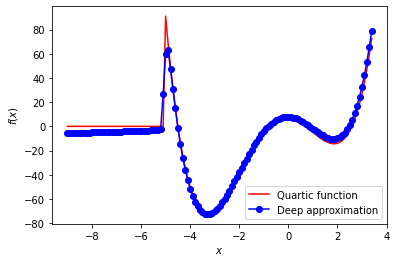

In [0]:
y_pred = model(x)
fig, ax = plt.subplots()
plt.plot(x.numpy(), y.numpy(),'r-',label='Quartic function')
plt.plot(x.numpy(), y_pred.detach().numpy(),'bo-',label='Deep approximation')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
ax.legend()
plt.show()

In [0]:
print("\nTotal number of parameters {}\n".format(count_parameters(model)))


Total number of parameters 1501

